In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state
from skbio.stats.composition import clr_inv as softmax
from gneiss.sort import niche_sort

/Users/mortonjt/miniconda3/envs/bayesian-regression/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
num_microbes = 20
num_metabolites = 100
num_samples = 100
num_latent_microbes = 5
num_latent_metabolites = 10
k = 3
seed = 0
low, high = -1, 1
microbe_total = 10
metabolite_total = 100

uB = 0
sigmaB = 2
sigmaQ = 0.1
uU1 = 0
sigmaU1 = 1
uU2 = 0
sigmaU2 = 1
uV1 = 0
sigmaV1 = 1
uV2 = 0
sigmaV2 = 1

In [3]:
state = check_random_state(seed)
    
beta = state.normal(uB, sigmaB, size=(2, k))

X = np.vstack((np.ones(num_samples), 
               np.linspace(low, high, num_samples))).T

Q = np.tanh(state.normal(X @ beta, sigmaQ))

U1 = state.normal(uU1, sigmaU1, size=(num_latent_microbes, num_microbes))
U2 = state.normal(uU2, sigmaU2, size=(k, num_latent_microbes))
V1 = state.normal(uV1, sigmaV1, size=(num_latent_metabolites, num_metabolites))
V2 = state.normal(uV2, sigmaV2, size=(k, num_latent_metabolites))

In [4]:
def multinomial(n, p):
    return np.vstack([np.random.multinomial(n, p[i, :]) 
                      for i in range(p.shape[0])]).T

In [5]:
microbe_counts = multinomial(microbe_total, softmax(Q @ U2 @ U1))
metabolite_counts = multinomial(metabolite_total, softmax(Q @ V2 @ V1))

microbe_counts = pd.DataFrame(microbe_counts)
metabolite_counts = pd.DataFrame(microbe_counts)

G = pd.Series(X[:, 1])
microbe_counts = niche_sort(microbe_counts, G)
metabolite_counts = niche_sort(metabolite_counts, G)

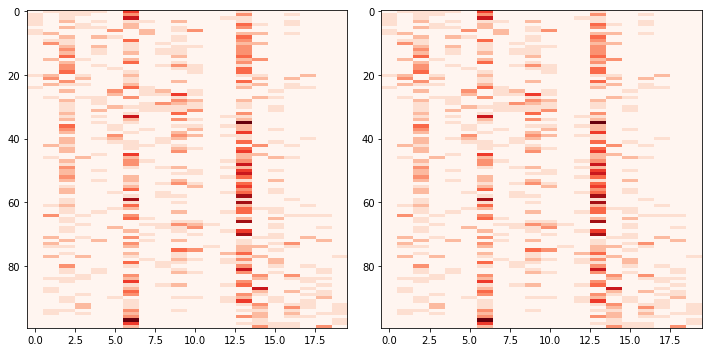

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
im1 = ax[0].imshow(microbe_counts.T, 
                   cmap=plt.cm.Reds, aspect='auto', interpolation='nearest')
im2 = ax[1].imshow(metabolite_counts.T, 
                   cmap=plt.cm.Reds, aspect='auto', interpolation='nearest')
plt.tight_layout()